https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
sns.set()

In [9]:
data = pd.read_csv('DataSet/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.target.unique()

array([1, 0], dtype=int64)

In [11]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train,y_train)
data_scaled = pd.DataFrame(X_scaled)

In [59]:
len(data_scaled.columns)

13

<Figure size 1440x2160 with 0 Axes>

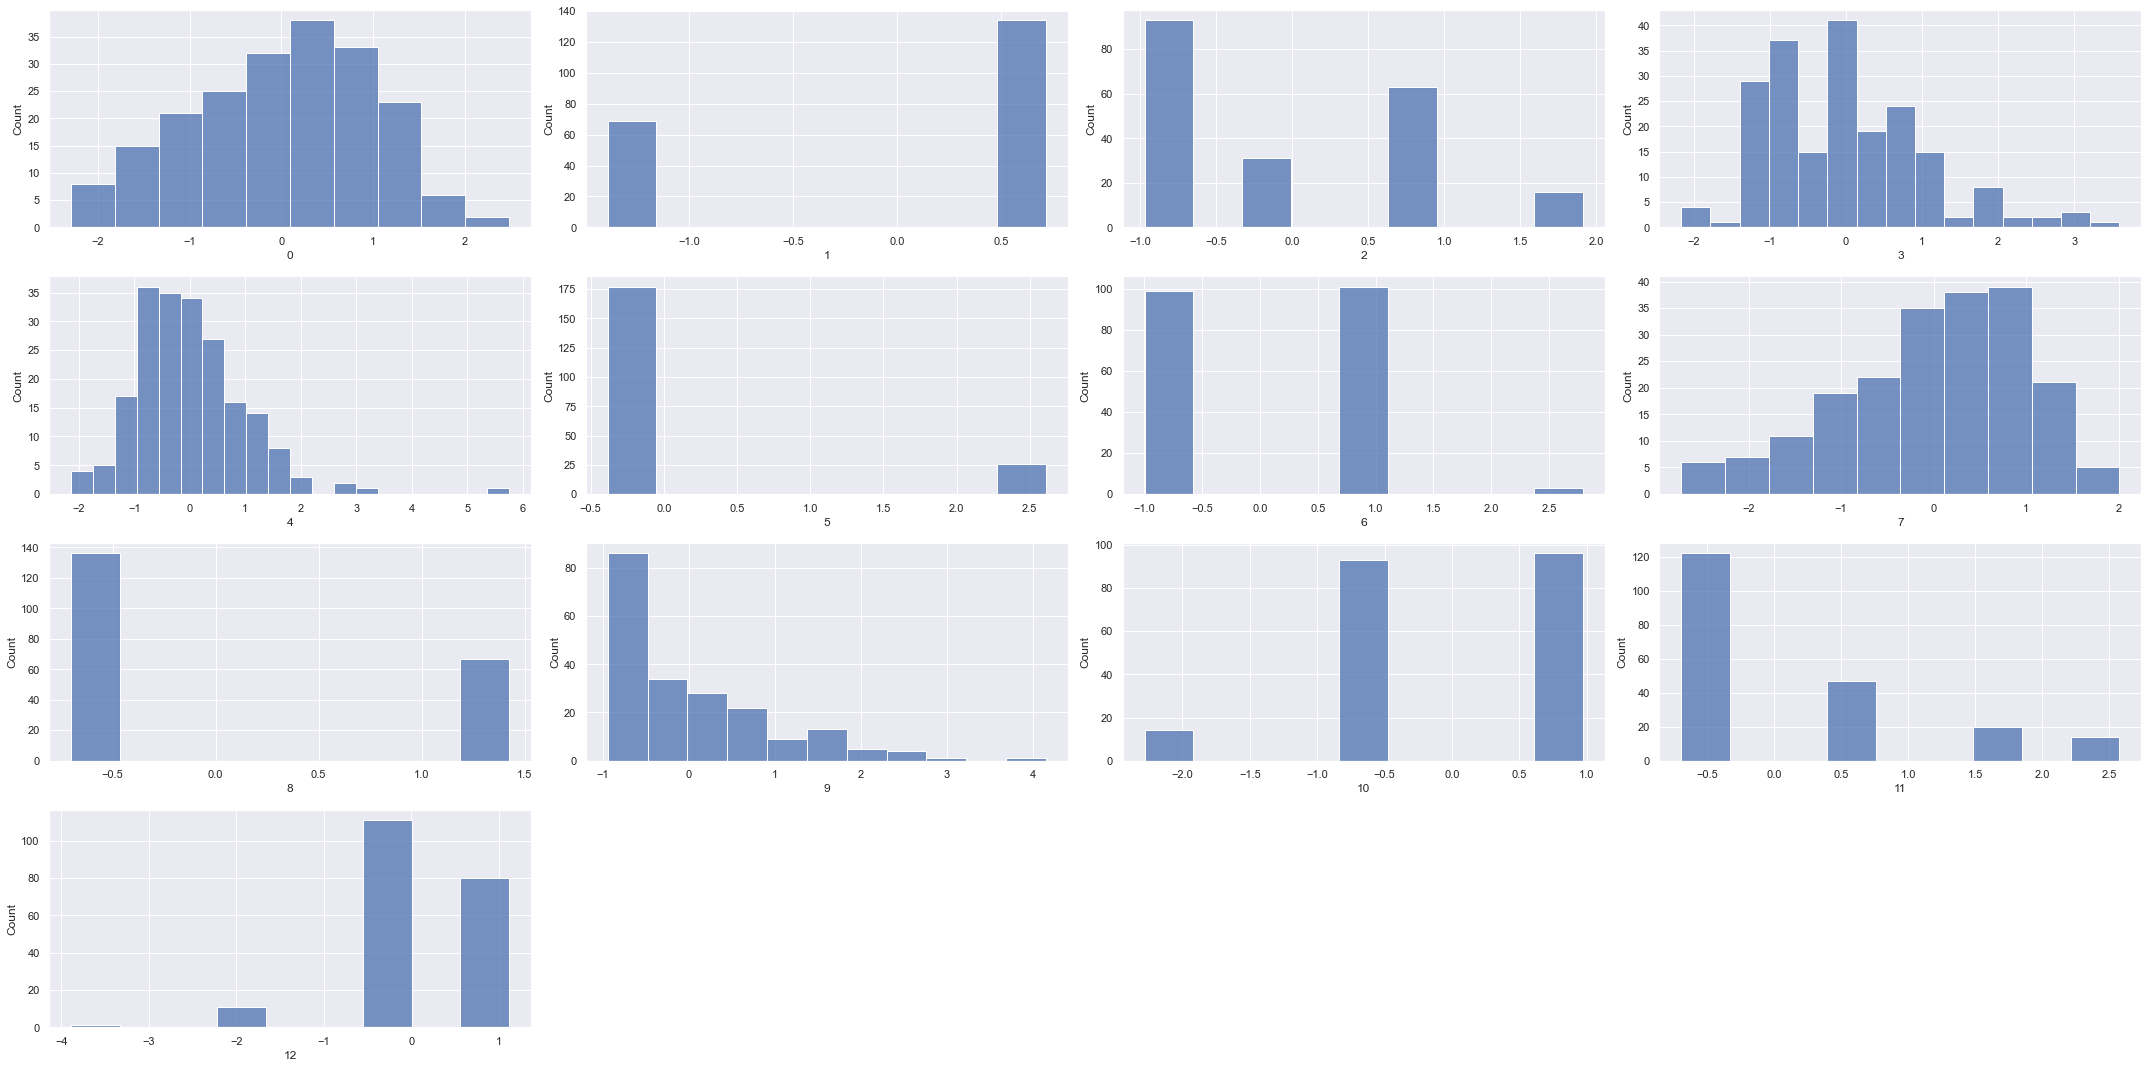

In [60]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
fig, axes = plt.subplots(ncols=len(data_scaled.columns), figsize=(30,15))
for ax, col in zip(axes, data_scaled.columns):
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(data_scaled[col], ax=ax)
    plotnumber+=1
plt.tight_layout() 
plt.show()

In [61]:
from sklearn.preprocessing import PowerTransformer

In [74]:
transformer = PowerTransformer()
transformer.fit(data_scaled)

PowerTransformer()

In [75]:
transformer.lambdas_

array([ 1.17121284,  2.56698094,  0.51621577,  0.5746126 ,  0.56124615,
       -3.94080192,  0.83519994,  1.3797119 , -0.6724022 ,  0.12784887,
        1.40824525, -0.50924439,  1.15374539])

In [76]:
transformed_new = transformer.transform(data_scaled)

In [77]:
transformed_df = pd.DataFrame(transformed_new)

In [78]:
transformed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133544,0.717583,0.998926,1.131980,-0.186721,-0.383266,-1.005785,0.639513,-0.701888,0.791310,1.011800,-0.797903,1.147673
1,0.323542,-1.393567,0.998926,-0.593345,1.534009,-0.383266,0.911095,1.038827,-0.701888,-1.153947,1.011800,-0.797903,-0.591264
2,-0.867821,0.717583,-1.016405,-1.231338,-0.840730,-0.383266,0.911095,-0.422461,-0.701888,-0.976364,1.011800,-0.797903,-0.591264
3,0.323542,0.717583,-1.016405,-1.065511,1.248647,-0.383266,2.517393,-0.543473,-0.701888,2.030493,-1.921290,1.718478,-2.068763
4,0.323542,0.717583,-1.016405,-2.306014,-0.143758,-0.383266,0.911095,0.166448,-0.701888,-0.976364,1.011800,0.937977,1.147673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-0.561312,0.717583,0.998926,0.658212,-0.165172,-0.383266,0.911095,0.530266,-0.701888,-0.201386,-0.755212,0.937977,1.147673
199,-0.456664,0.717583,0.998926,-2.890189,-0.296437,-0.383266,0.911095,0.068187,1.424728,-1.153947,1.011800,0.937977,1.147673
200,1.701480,0.717583,1.642145,1.552455,-0.143758,2.609155,-1.005785,-0.883139,-0.701888,-0.976364,-0.755212,0.937977,-0.591264
201,-0.967814,0.717583,-1.016405,-0.593345,0.160576,-0.383266,-1.005785,-0.381089,-0.701888,0.054860,1.011800,-0.797903,1.147673


<Figure size 1440x2160 with 0 Axes>

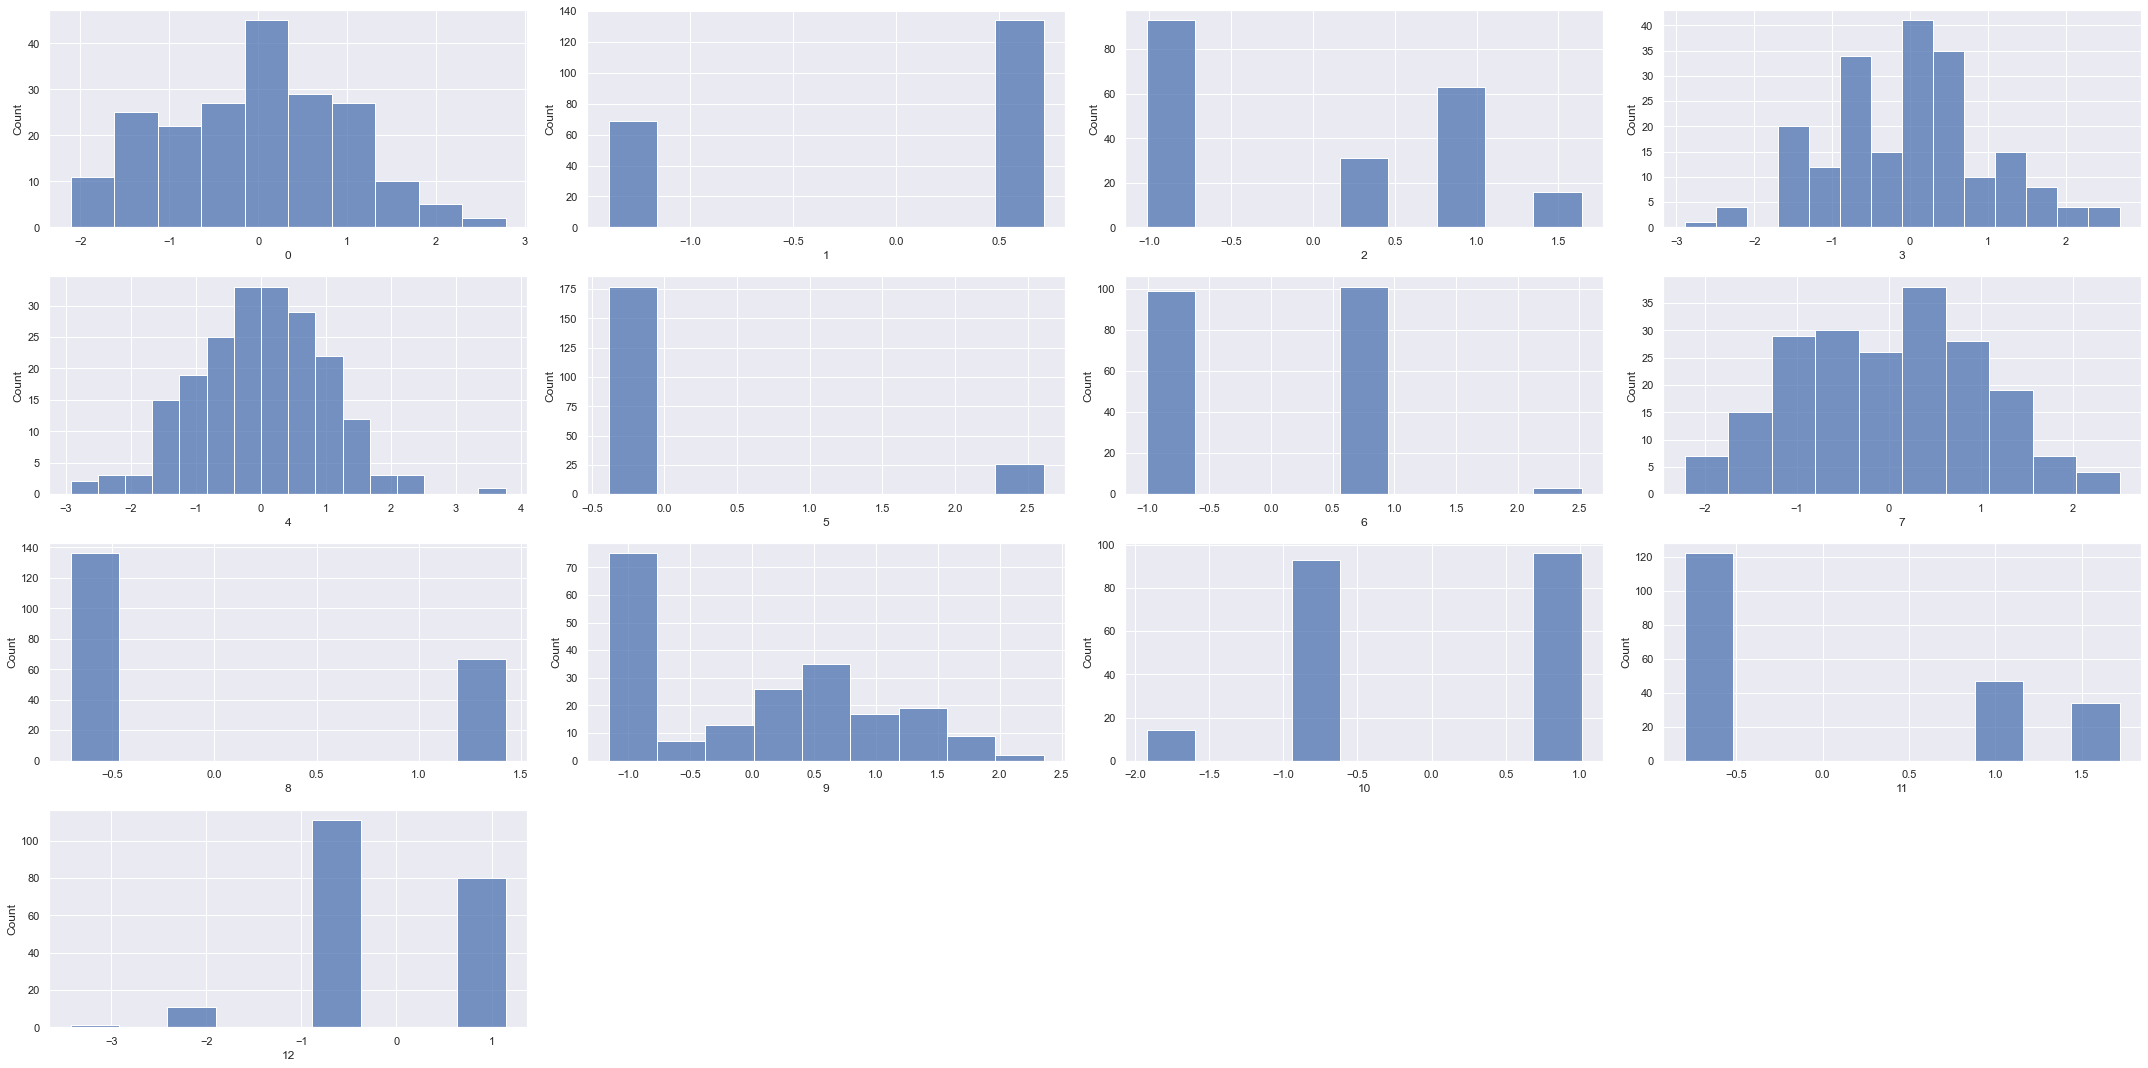

In [79]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
fig, axes = plt.subplots(ncols=len(transformed_df.columns), figsize=(30,15))
for ax, col in zip(axes, transformed_df.columns):
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(transformed_df[col], ax=ax)
    plotnumber+=1
plt.tight_layout() 
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()
model.fit(transformed_df,y_train)

LogisticRegression()

In [84]:
scale = scaler.transform(X_test)
X_test_transform = transformer.transform(scale)
y_pred = model.predict(scale)

In [102]:
score = model.score(X_test_transform,y_pred)

In [91]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,recall_score

In [100]:
cm = confusion_matrix(y_test,y_pred)

In [95]:
auc = roc_auc_score(y_test,y_pred)

In [93]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred)

In [92]:
recall_score(y_test,y_pred)

0.8103448275862069

In [98]:
tpr

array([0.        , 0.81034483, 1.        ])

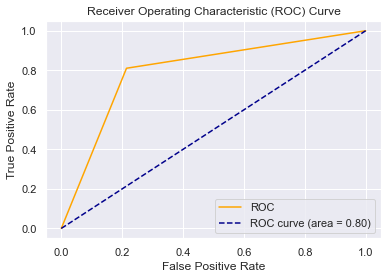

In [96]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

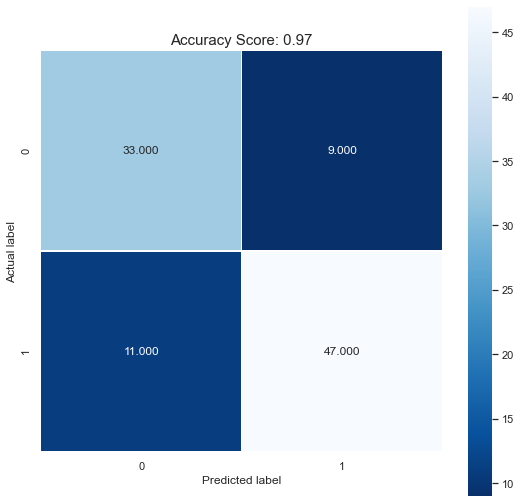

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [110]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(transformed_df,y_train)


In [113]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [114]:
model = LogisticRegression(solver='liblinear')
model.fit(transformed_df,y_train)

LogisticRegression(solver='liblinear')

In [115]:
y_pred = model.predict(scale)
score = model.score(X_test_transform,y_pred)
cm = confusion_matrix(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds  = roc_curve(y_test,y_pred)
recall_score(y_test,y_pred)

0.8103448275862069

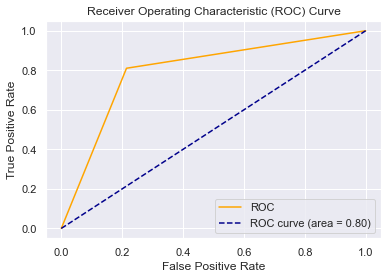

In [116]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

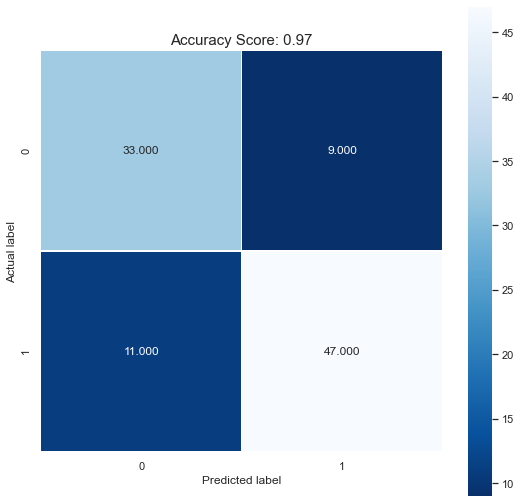

In [117]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);